### Voice Categorization - Male of Female (Using SVM)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('voice-classification.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.info() #all columns are numerical except label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
df.describe().T #statistical concepts

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [5]:
# check for null value
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
print('Shape of data',df.shape)
print('No.of labels: {}'.format(df.shape[0]))
print('Number of male: {}'.format(df[df.label=='male'].shape[0]))
print('Nubmer of female: {}'.format(df[df.label=='female'].shape[0])) 

Shape of data (3168, 21)
No.of labels: 3168
Number of male: 1584
Nubmer of female: 1584


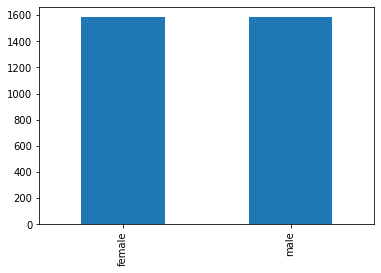

In [7]:
#No biasing in dataset (target)
df['label'].value_counts().plot.bar()

In [8]:
x=df.drop('label',axis=1) #features
y=df['label'] #target

### Label encoding 

In [9]:
from sklearn.preprocessing import  LabelEncoder

gen_encoder=LabelEncoder()
y=gen_encoder.fit_transform(y)
type(y)

numpy.ndarray

In [10]:
y #observe male=1 and female =0

array([1, 1, 1, ..., 0, 0, 0])

### Normalize/Standarize the Data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

### Split the data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [13]:
from sklearn.svm import SVC

svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
y_train_pred=svc_model.predict(X_train)
from sklearn import metrics

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred))

Accuracy for testing data is:  0.982124079915878
Accuracy for training data is:  0.9855660802886784


### Kernels

'rbf'- by default,'linear'

In [14]:
svc_model_lin=SVC(kernel='linear')
svc_model_lin.fit(X_train,y_train)
y_pred_lin=svc_model_lin.predict(X_test)
y_train_pred_lin=svc_model_lin.predict(X_train)

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_lin))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_lin))

Accuracy for testing data is:  0.9758149316508938
Accuracy for training data is:  0.9765448804691024


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_log=logreg.predict(X_test)
y_train_pred_log=logreg.predict(X_train)

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_log))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_log))

Accuracy for testing data is:  0.9758149316508938
Accuracy for training data is:  0.9747406405051872


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred_log))

[[463  11]
 [ 12 465]]


In [17]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       474
           1       0.98      0.97      0.98       477

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



### Naives Bayes Model

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred_NB=gnb.predict(X_test)
y_train_pred_NB=gnb.predict(X_train)

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_NB))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_NB))


Accuracy for testing data is:  0.8916929547844374
Accuracy for training data is:  0.8881371222372576


In [19]:
from sklearn.naive_bayes import BernoulliNB

gnb1=BernoulliNB()
gnb1.fit(X_train,y_train)
y_pred_NB1=gnb1.predict(X_test)
y_train_pred_NB1=gnb1.predict(X_train)

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_NB1))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_NB1))

Accuracy for testing data is:  0.8580441640378549
Accuracy for training data is:  0.8669373026612539


### Iris dataset

In [20]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg_iris = LogisticRegression()
logreg_iris.fit(X_train,y_train)

y_pred_log_iris=logreg_iris.predict(X_test)
y_train_pred_log_iris=logreg_iris.predict(X_train)

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_log_iris))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_log_iris))

Accuracy for testing data is:  0.9333333333333333
Accuracy for training data is:  0.9904761904761905


Ovefitting problem, results are not stable, and is less for testing data

In [24]:
from sklearn.svm import SVC

svc_model_iris=SVC(kernel='linear')
svc_model_iris.fit(X_train,y_train)
y_pred_iris=svc_model_iris.predict(X_test)
y_train_pred_iris=svc_model_iris.predict(X_train)
from sklearn import metrics

print('Accuracy for testing data is: ',metrics.accuracy_score(y_test,y_pred_iris))
print('Accuracy for training data is: ',metrics.accuracy_score(y_train,y_train_pred_iris))

Accuracy for testing data is:  0.9555555555555556
Accuracy for training data is:  1.0
